# Demographics 

## Age Distribution 

In [3]:
# age data
import pandas as pd

age_dist = pd.read_csv("YOUTH_AGE_GROUPS_IN_10_YEARS_South_Africa.csv")
age_dist.head()


,geo_code,geoid,name,total,0-14,15-24,25-34,35-44,45-54,55-64,65+,province
0,ZA,country-ZA,South Africa,50929991,14827005,10140505,8778426,6352271,4819355,3169599,2842830,South Africa
1,WC044,municipality-WC044,George,192398,50362,33649,31272,27867,22214,14517,12517,Western Cape
2,WC047,municipality-WC047,Bitou,48713,12261,7847,9355,7725,5228,3162,3135,Western Cape
3,WC048,municipality-WC048,Knysna,67992,16885,10873,11946,10019,7176,5359,5734,Western Cape
4,WC051,municipality-WC051,Laingsburg,8234,2140,1238,1231,1256,1022,740,607,Western Cape


In [4]:
#normalising the data 

age_norm = pd.DataFrame()

age_norm['geo_code'] = age_dist['geo_code']
age_norm['name'] = age_dist['name']
age_norm['province'] = age_dist['province']
age_norm['total'] = age_dist['total']
age_norm['0-14'] = age_dist['0-14'] / age_dist.total
age_norm['15-24'] = age_dist['15-24'] / age_dist.total
age_norm['25-34'] = age_dist['25-34'] / age_dist.total
age_norm['35-44'] = age_dist['35-44'] / age_dist.total
age_norm['45-54'] = age_dist['45-54'] / age_dist.total
age_norm['55-64'] = age_dist['55-64'] / age_dist.total

#age_norm.to_csv("/home/dside/Documents/GitHub/NormalisedYouth/YOUTH_AGE_GROUPS_NORMALISED.csv")

In [9]:
# municipality-province link

prov_link = pd.read_csv("prov_link.csv")
#prov_link.head()
#prov_link.shape #300 x 3

In [11]:
# function: links municipality to corresponding province  
def prov_gen(target, dictionary):

    prov = pd.DataFrame()
    target_codes = target.geo_code
    
    for i in range(0,len(target)): #for each row in the original data set
        for j in range(0,len(dictionary)):# find the correct province
            if target_codes.iloc[i] == dictionary.iloc[j,1]:
                prov = prov.set_value(len(prov),"province", dictionary.iloc[j,2])
    target["province"] = prov
    return target

In [5]:
#adding province to age-groups dataframe

#prov_gen(age_dist,prov_link)
age_norm = age_norm[age_norm.geo_code != 'ZA']


In [6]:
age_by_prov = age_norm.groupby(by = "province").mean()
age_by_prov

,total,0-14,15-24,25-34,35-44,45-54,55-64
province,,,,,,,
Eastern Cape,1.622815e+05,0.327472,0.194741,0.128631,0.106000,0.096431,0.071697
Free State,1.395408e+05,0.311552,0.192803,0.153923,0.117006,0.096463,0.068386
Gauteng,1.206176e+06,0.250870,0.181754,0.196743,0.146293,0.107834,0.066321
KwaZulu-Natal,1.933348e+05,0.352173,0.215230,0.143934,0.098822,0.079100,0.057115
Limpopo,2.191425e+05,0.333378,0.214903,0.147623,0.104833,0.079518,0.053799
Mpumalanga,1.982742e+05,0.304648,0.202887,0.169514,0.120158,0.092113,0.059942
North West,2.006695e+05,0.305024,0.187324,0.157373,0.122343,0.100607,0.066932
Northern Cape,1.788456e+05,0.289495,0.174642,0.150278,0.126921,0.104830,0.072083
Western Cape,8.508225e+04,0.259465,0.174261,0.161795,0.142684,0.114826,0.076177


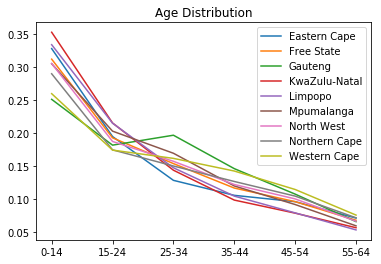

In [7]:
from numpy import *
import math
import matplotlib.pyplot as plt

t = linspace(0, 2.265305e+06)
#a = age_by_prov.iloc[0,1:8]


for i in range(0,len(age_by_prov)):
    curr_data = age_by_prov.iloc[i,1:8]
    plt.plot(curr_data, label = age_by_prov.index[i]) 
plt.legend(loc='best') 
plt.title("Age Distribution")
plt.show()



## Gender Distribution 

In [8]:
# gender distribution
gender_dist = pd.read_csv("YOUTH_GENDER_POPULATION_GROUP_South_Africa.csv")
#gender_dist.head()

,geo_level,geo_code,geoid,name,total,Female,Female_Black,Female_Coloured,Female_Indian_Asian,Female_Other,Female_White,Male,Male_Black,Male_Coloured,Male_Indian_Asian,Male_Other,Male_White
0,country,ZA,country-ZA,South Africa,10140505,5101916,4266555,429852,103701,16736,285072,5038589,4184184,423331,112650,28794,289630
1,municipality,WC044,municipality-WC044,George,33651,17037,5541,9254,85,102,2055,16614,5216,8988,82,263,2065
2,municipality,WC047,municipality-WC047,Bitou,7848,3949,2052,1366,30,186,315,3899,1942,1334,18,242,363
3,municipality,WC048,municipality-WC048,Knysna,10874,5560,2398,2578,22,44,518,5314,2204,2481,26,94,509
4,municipality,WC051,municipality-WC051,Laingsburg,1237,617,40,543,0,7,27,620,58,521,0,6,35


In [12]:
#grouping by province

gender_dist = prov_gen(gender_dist, prov_link)
gender_dist.head()


,geo_level,geo_code,geoid,name,total,Female,Female_Black,Female_Coloured,Female_Indian_Asian,Female_Other,Female_White,Male,Male_Black,Male_Coloured,Male_Indian_Asian,Male_Other,Male_White,province
0,country,ZA,country-ZA,South Africa,10140505,5101916,4266555,429852,103701,16736,285072,5038589,4184184,423331,112650,28794,289630,South Africa
1,municipality,WC044,municipality-WC044,George,33651,17037,5541,9254,85,102,2055,16614,5216,8988,82,263,2065,Western Cape
2,municipality,WC047,municipality-WC047,Bitou,7848,3949,2052,1366,30,186,315,3899,1942,1334,18,242,363,Western Cape
3,municipality,WC048,municipality-WC048,Knysna,10874,5560,2398,2578,22,44,518,5314,2204,2481,26,94,509,Western Cape
4,municipality,WC051,municipality-WC051,Laingsburg,1237,617,40,543,0,7,27,620,58,521,0,6,35,Western Cape


In [ ]:
# normalising this data





In [58]:
#gprov.shape

gender_dist['province'] = gprov
gender_dist = gender_dist[gender_dist.geo_code != 'ZA']
gender_dist.head()


,geo_level,geo_code,geoid,name,total,Female,Female_Black,Female_Coloured,Female_Indian_Asian,Female_Other,Female_White,Male,Male_Black,Male_Coloured,Male_Indian_Asian,Male_Other,Male_White,province
1,municipality,WC044,municipality-WC044,George,33651,17037,5541,9254,85,102,2055,16614,5216,8988,82,263,2065,Western Cape
2,municipality,WC047,municipality-WC047,Bitou,7848,3949,2052,1366,30,186,315,3899,1942,1334,18,242,363,Western Cape
3,municipality,WC048,municipality-WC048,Knysna,10874,5560,2398,2578,22,44,518,5314,2204,2481,26,94,509,Western Cape
4,municipality,WC051,municipality-WC051,Laingsburg,1237,617,40,543,0,7,27,620,58,521,0,6,35,Western Cape
5,municipality,WC052,municipality-WC052,Prince Albert,2246,1099,26,1020,1,1,51,1147,31,1030,7,8,71,Western Cape


In [166]:
gender_by_prov = gender_dist.groupby(by = "province").mean()
gender_by_prov

,total,Female,Female-Black African,Female-Coloured,Female-Indian or Asian,Female-Other,Female-White,Male,Male-Black African,Male-Coloured,Male-Indian or Asian,Male-Other,Male-White
province,,,,,,,,,,,,,
Eastern Cape,26485.975000,13154.900000,12005.600000,846.000000,31.225000,19.500000,252.575000,13331.075000,12126.425000,846.925000,44.575000,55.950000,257.200000
Free State,32416.450000,16391.300000,13839.600000,1505.150000,73.650000,48.100000,924.800000,16025.150000,13421.200000,1455.500000,99.000000,103.150000,946.300000
Gauteng,182429.600000,91252.000000,76784.600000,3711.000000,2049.900000,335.400000,8371.100000,91177.600000,76341.500000,3593.800000,2259.100000,513.800000,8469.400000
KwaZulu-Natal,51553.480769,26191.692308,23094.500000,402.019231,1351.519231,63.173077,1280.480769,25361.788462,22188.557692,393.923077,1387.115385,90.884615,1301.307692
Limpopo,47978.800000,24116.280000,23706.480000,57.600000,46.560000,19.080000,286.560000,23862.520000,23372.240000,62.400000,77.520000,49.840000,300.520000
Mpumalanga,41447.588235,20701.470588,19208.823529,367.823529,97.352941,24.470588,1003.000000,20746.117647,19102.352941,363.176471,159.705882,74.000000,1046.882353
North West,39343.947368,19658.526316,17977.315789,376.473684,88.473684,42.157895,1174.105263,19685.421053,17894.894737,365.578947,146.421053,84.105263,1194.421053
Northern Cape,8441.851852,4198.074074,2433.703704,1504.629630,20.037037,48.629630,191.074074,4243.777778,2452.666667,1490.444444,34.111111,64.592593,201.962963
Western Cape,43671.250000,22154.625000,8928.666667,10517.750000,215.083333,222.500000,2270.625000,21516.625000,8258.708333,10374.791667,242.166667,366.291667,2274.666667


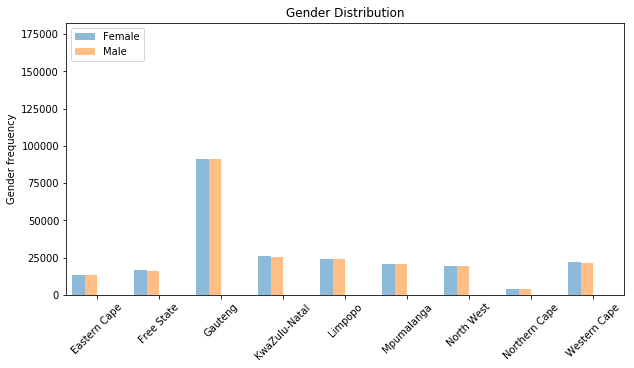

In [261]:
#note: sort bars and find way to label..


%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#objects = gender_by_prov.index
#y_pos = np.arange(len(objects))
female = gender_by_prov.Female
male = gender_by_prov.Male
 
#setting positions and width of bars
pos = list(range(len(gender_by_prov['Female']))) 
width = 0.2

fig, ax = plt.subplots(figsize=(10,5))


# creating the bars for the resp. measures
plt.bar(pos, female, width, alpha = 0.5, label = gender_by_prov.index)
plt.bar([p + width for p in pos], male, width, alpha = 0.5, label = gender_by_prov.index)
    
    
#axes labels
ax.set_title('Gender Distribution')
ax.set_ylabel('Gender frequency')

ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(gender_by_prov.index)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
#limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(gender_by_prov['Female'] + gender_by_prov['Male'])])

#legends and plot
plt.legend(['Female', 'Male'], loc='upper left')
#female = female.to_frame("female")
#female.columns

#plt.sort(female.female)
#plt.grid()
plt.show()
 
#Notice how close the diff genders are as well as the provinces with a larger population.    
    


In [258]:
female = gender_by_prov.Female

type(female[1])

numpy.float64

## Race  Distribution

In [54]:
race_dist = pd.read_csv("YOUTH_GENDER_POPULATION_GROUP_South_Africa.csv")
race_dist.head()


,geo_level,geo_code,geoid,name,total,Female,Female_Black,Female_Coloured,Female_Indian_Asian,Female_Other,Female_White,Male,Male_Black,Male_Coloured,Male_Indian_Asian,Male_Other,Male_White
0,country,ZA,country-ZA,South Africa,10140505,5101916,4266555,429852,103701,16736,285072,5038589,4184184,423331,112650,28794,289630
1,municipality,WC044,municipality-WC044,George,33651,17037,5541,9254,85,102,2055,16614,5216,8988,82,263,2065
2,municipality,WC047,municipality-WC047,Bitou,7848,3949,2052,1366,30,186,315,3899,1942,1334,18,242,363
3,municipality,WC048,municipality-WC048,Knysna,10874,5560,2398,2578,22,44,518,5314,2204,2481,26,94,509
4,municipality,WC051,municipality-WC051,Laingsburg,1237,617,40,543,0,7,27,620,58,521,0,6,35


In [59]:
race = pd.DataFrame()

race['municipality'] = race_dist.geo_code
race['province'] = gender_dist.province
race['Black'] = race_dist.Female_Black + race_dist.Male_Black 
race['Coloured']= race_dist.Female_Coloured + race_dist.Male_Coloured
race['Indian_Asian'] = race_dist.Female_Indian_Asian + race_dist.Male_Indian_Asian
race['White'] = race_dist.Female_White + race_dist.Male_White
race['Other'] = race_dist.Female_Other + race_dist.Male_Other


race = race[race.municipality != "ZA"]

race.head()


,municipality,province,Black,Coloured,Indian_Asian,White,Other
1,WC044,Western Cape,10757,18242,167,4120,365
2,WC047,Western Cape,3994,2700,48,678,428
3,WC048,Western Cape,4602,5059,48,1027,138
4,WC051,Western Cape,98,1064,0,62,13
5,WC052,Western Cape,57,2050,8,122,9


In [60]:
race_prov = race.groupby(by = "province").mean()
race_prov

,Black,Coloured,Indian_Asian,White,Other
province,,,,,
Eastern Cape,28732.375000,2854.975000,130.950000,1052.025000,129.800000
Free State,25141.850000,833.150000,96.500000,1578.050000,65.100000
Gauteng,184291.400000,7932.700000,5072.800000,23653.300000,1081.800000
KwaZulu-Natal,37291.000000,529.461538,2579.250000,962.711538,99.692308
Limpopo,47183.760000,116.280000,129.200000,585.040000,71.920000
Mpumalanga,38551.294118,371.235294,251.176471,2107.647059,97.117647
North West,34868.789474,839.947368,238.526316,2374.736842,125.473684
Northern Cape,15323.222222,13708.925926,391.185185,2928.666667,506.629630
Western Cape,4389.916667,9172.583333,72.666667,1658.791667,146.750000


TypeError: unsupported operand type(s) for -: 'list' and 'float'

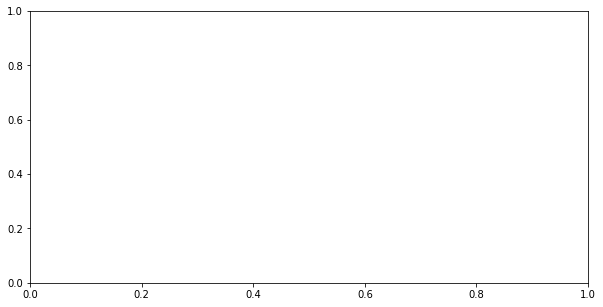

In [65]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#pos = list(range(len(race_prov))) 
pos = list(range(len(race_prov['Black']))) 
width = 0.2

fig, ax = plt.subplots(figsize=(10,5))

#npa = np.asarray(someListOfLists, dtype=np.float32)
#Black = np.asarray(race_prov.Black,dtype=np.float32)
Black = race_prov.Black
Coloured = race_prov.Coloured
Indian = race_prov.Indian_Asian
White = race_prov.White
Other = race_prov.Other


# creating the bars for the resp. measures
plt.bar(pos - 0.4, Black, width, alpha = 0.5, label = race_prov.index)
plt.bar(pos - 0.2, Coloured, width, alpha = 0.5, label = race_prov.index)
plt.bar(pos, Indian, width, alpha = 0.5, label = race_prov.index)
plt.bar(pos + 0.2, White, width, alpha = 0.5, label = race_prov.index)
plt.bar(pos + 0.4, Other, width, alpha = 0.5, label = race_prov.index)
  
    
#axes labels
ax.set_title('Population Group Distribution')
ax.set_ylabel('Frequency')

ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(gender_by_prov.index)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
#limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(race_prov['Black'] + race_prov['Coloured'] + 
                 race_prov['Indian_Asian'] + race_prov['White']+ race_prov['Other'])])

#legends and plot
plt.legend(['Black', 'Coloured', 'India_Asian', 'White', 'Other'], loc='upper left')

plt.show()

In [9]:

#race_prov.plot(kind="bar", x=race_prov.index, y="Frequency")
#race_prov.sort_values(by='Black',ascending=False).plot(title="Population Group Distribution",
                 #kind='bar',x="province",y="Frequency",figsize=(10,5))





#female.plot(kind="bar", x="province",y="Frequency")
#male.plot(kind="bar", x="province",y="Frequency")
#female.sort_values(by='Female',ascending=False).plot(title="Gender Distribution",
                                                            # kind='bar',x="province",y="Frequency",figsize=(10,5))
#plt.show() 

## Wellness Measure

In [3]:
import pandas as pd

elec = pd.read_csv("YOUTH_ELECTRICITY_ACCESS_GENDER_South_Africa.csv")
water = pd.read_csv("YOUTH_WATER_ACCESS_GENDER_South_Africa.csv")
toi = pd.read_csv("YOUTH_TOILET_ACCESS_GENDER_South_Africa.csv")
internet = pd.read_csv("YOUTH_ACCESS_TO_INTERNET_GENDER_South_Africa.csv")

In [11]:
elec.head()

,geo_level,geo_code,geoid,name,total,Electricity_for_everything,Electricity_for_everything_Female,Electricity_for_everything_Male,Electricity_for_some_things,Electricity_for_some_things_Female,Electricity_for_some_things_Male,No_electricity,No_electricity_Female,No_electricity_Male
0,country,ZA,country-ZA,South Africa,10140504,5339630,2699290,2640340,3352217,1677965,1674252,1448657,724660,723997
1,municipality,WC044,municipality-WC044,George,33649,18297,9274,9023,12910,6516,6394,2442,1247,1195
2,municipality,WC047,municipality-WC047,Bitou,7848,3582,1755,1827,3870,2009,1861,396,185,211
3,municipality,WC048,municipality-WC048,Knysna,10872,6368,3294,3074,3572,1792,1780,932,473,459
4,municipality,WC051,municipality-WC051,Laingsburg,1237,842,443,399,240,108,132,155,67,88


In [12]:
water.head()

,geo_level,geo_code,geoid,name,total,less_1km,less_1km_Female,less_1km_Male,more_1km,more_1km_Female,more_1km_Male,No_piped_water,No_piped_water_Female,No_piped_water_Male,On_site,On_site_Female,On_site_Male
0,country,ZA,country-ZA,South Africa,10102512,1781894,890187,891707,104102,52985,51117,1133335,570698,562637,7083181,3568653,3514528
1,municipality,WC044,municipality-WC044,George,33541,1887,985,902,24,16,8,914,477,437,30716,15507,15209
2,municipality,WC047,municipality-WC047,Bitou,7835,989,483,506,45,21,24,64,33,31,6737,3407,3330
3,municipality,WC048,municipality-WC048,Knysna,10848,1920,1042,878,9,5,4,167,78,89,8752,4423,4329
4,municipality,WC051,municipality-WC051,Laingsburg,1235,22,6,16,0,0,0,13,3,10,1200,606,594


In [13]:
toi.head()

,geo_level,geo_code,geoid,name,total,Chemical_toilet,Chemical_toilet_Female,Chemical_toilet_Male,Flush_toilet,Flush_toilet_Female,...,No_toilet_facilities_Male,Other,Other_Female,Other_Male,Pit_latrine_ventilated,Pit_latrine_ventilated_Female,Pit_latrine_ventilated_Male,Unventilated_pit_latrine_Bucket_toilet,Unventilated_pit_latrine_Bucket_toilet_Female,Unventilated_pit_latrine_Bucket_toilet_Male
0,country,ZA,country-ZA,South Africa,10102511,306921,154456,152465,5464425,2758253,...,279151,233238,116317,116921,1095638,550804,544834,2440053,1219608,1220445
1,municipality,WC044,municipality-WC044,George,33544,209,101,108,29262,14837,...,752,345,173,172,772,377,395,1387,682,705
2,municipality,WC047,municipality-WC047,Bitou,7837,22,14,8,6678,3357,...,113,56,26,30,224,119,105,666,350,316
3,municipality,WC048,municipality-WC048,Knysna,10848,47,29,18,8114,4109,...,265,851,470,381,143,73,70,1171,610,561
4,municipality,WC051,municipality-WC051,Laingsburg,1234,20,10,10,1031,526,...,39,5,2,3,48,22,26,65,29,36


In [14]:
internet.head()

,geo_level,geo_code,geoid,name,total,From_cell_phone,From_cell_phone_Female,From_cell_phone_Male,From_elsewhere,From_elsewhere_Female,From_elsewhere_Male,From_home,From_home_Female,From_home_Male,From_work,From_work_Female,From_work_Male,No_access_to_internet,No_access_to_internet_Female,No_access_to_internet_Male
0,country,ZA,country-ZA,South Africa,9848922,2010246,1039386,970860,649314,334591,314723,667322,333692,333630,291514,150220,141294,6230526,3108956,3121570
1,municipality,WC044,municipality-WC044,George,32511,5769,3043,2726,1389,715,674,2931,1448,1483,1030,541,489,21392,10825,10567
2,municipality,WC047,municipality-WC047,Bitou,7563,1495,801,694,534,296,238,563,266,297,234,115,119,4737,2353,2384
3,municipality,WC048,municipality-WC048,Knysna,10590,1534,784,750,412,200,212,923,467,456,288,150,138,7433,3824,3609
4,municipality,WC051,municipality-WC051,Laingsburg,1174,187,91,96,69,32,37,22,13,9,26,13,13,870,435,435


In [10]:
#wellfare = pd.DataFrame()  

#elec = elec.rename(columns={ 'Have electricity for everything': 'Electricity_for_everything',
 #                                     'Have electricity for everything-Female': 'Electricity_for_everything_Female',
  #                                   'Have electricity for everything-Male': 'Electricity_for_everything_Male',
   #                                  'Have electricity for some things': 'Electricity_for_some_things',
    #                                 'Have electricity for some things-Female': 'Electricity_for_some_things_Female',
     #                                 'Have electricity for some things-Male': 'Electricity_for_some_things_Male',
      #                                'No electricity': 'No_electricity',
       #                               'No_electricity_Female': 'No_electricity_Female',
        #                              'No electricity-Male': 'No_electricity_Male'
         #                            })                   

,geo_level,geo_code,geoid,name,total,Electricity_for_everything,Electricity_for_everything_Female,Electricity_for_everything_Male,Electricity_for_some_things,Electricity_for_some_things_Female,Electricity_for_some_things_Male,No_electricity,No_electricity_Female,No_electricity_Male
0,country,ZA,country-ZA,South Africa,10140504,5339630,2699290,2640340,3352217,1677965,1674252,1448657,724660,723997
1,municipality,WC044,municipality-WC044,George,33649,18297,9274,9023,12910,6516,6394,2442,1247,1195
2,municipality,WC047,municipality-WC047,Bitou,7848,3582,1755,1827,3870,2009,1861,396,185,211
3,municipality,WC048,municipality-WC048,Knysna,10872,6368,3294,3074,3572,1792,1780,932,473,459
4,municipality,WC051,municipality-WC051,Laingsburg,1237,842,443,399,240,108,132,155,67,88


In [16]:
wellfare = pd.DataFrame()
wellfare['electricity_access'] = elec.Electricity_for_everything / elec.total
wellfare['toilet_access'] = toi.Flush_toilet / toi.total
wellfare['water_access'] = water.On_site / water.total
wellfare['internet_access'] = internet.From_home / internet.total
wellfare['wellfare_measure'] = 1/4 * (wellfare.electricity_access + wellfare.toilet_access
                                      +  wellfare.water_access +  wellfare.internet_access)
wellfare['mun_code'] =  internet.geo_code

In [23]:
prov_link = pd.read_csv("prov_link.csv")
prov_link.head()

,Name,Code,Province
0,Buffalo City Metropolitan Municipality,BUF,Eastern Cape
1,City of Cape Town Metropolitan Municipality,CPT,Western Cape
2,City of Johannesburg Metropolitan Municipality,JHB,Gauteng
3,City of Tshwane Metropolitan Municipality,TSH,Gauteng
4,Ekurhuleni Metropolitan Municipality,EKU,Gauteng


In [24]:
#adding in the municipality and province.

prov = pd.DataFrame()

for i in range(0,len(wellfare)): #for each row in the original data set
        for j in range(0,len(prov_link)):# find the correct province
            if wellfare.iloc[i,5] == prov_link.iloc[j,1]:
                prov = prov.set_value(len(prov),"province", prov_link.iloc[j,2])

wellfare['province'] = prov

In [25]:
wellfare.head()

,electricity_access,toilet_access,water_access,internet_access,wellfare_measure,mun_code,province
0,0.526565,0.540898,0.701131,0.067756,0.459087,ZA,South Africa
1,0.543761,0.872347,0.915775,0.090154,0.605509,WC044,Western Cape
2,0.456422,0.852112,0.859860,0.074441,0.560709,WC047,Western Cape
3,0.585725,0.747972,0.806785,0.087158,0.556910,WC048,Western Cape
4,0.680679,0.835494,0.971660,0.018739,0.626643,WC051,Western Cape


In [26]:
wellfare_prov = wellfare.groupby(by = "province").mean()
wellfare_prov

,electricity_access,toilet_access,water_access,internet_access,wellfare_measure
province,,,,,
Eastern Cape,0.311002,0.429169,0.540072,0.030282,0.327631
Free State,0.484606,0.660445,0.869845,0.036244,0.512785
Gauteng,0.674973,0.850941,0.894883,0.090857,0.627913
KwaZulu-Natal,0.328265,0.223260,0.449077,0.030520,0.257780
Limpopo,0.349136,0.205915,0.520071,0.025576,0.275175
Mpumalanga,0.465801,0.538705,0.783240,0.050492,0.459560
North West,0.547642,0.449124,0.653385,0.041153,0.422826
Northern Cape,0.596944,0.719527,0.871602,0.040778,0.557213
South Africa,0.526565,0.540898,0.701131,0.067756,0.459087


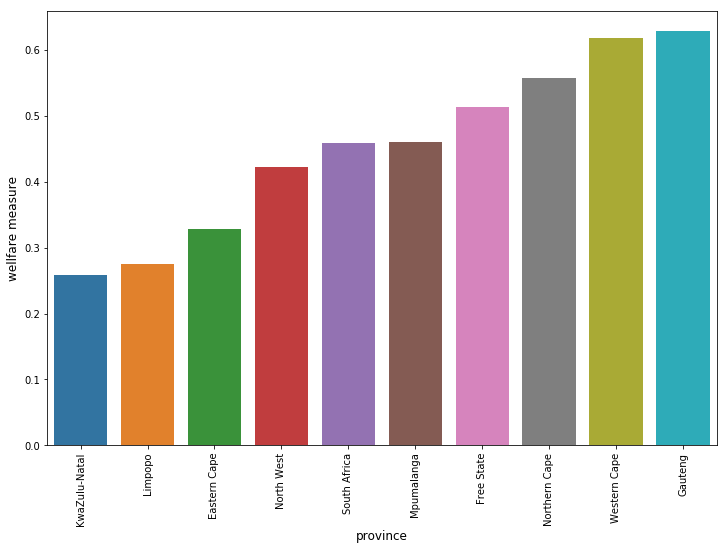

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

result = wellfare.groupby("province").mean().reset_index().sort_values('wellfare_measure')
plt.figure(figsize=(12,8))
sns.barplot(x="province", y="wellfare_measure", data = result)
plt.ylabel('wellfare measure', fontsize=12)
plt.xlabel('province', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()




In [ ]:
#renaming columns and writing to csv file

#race_dist = race_dist.rename(columns={ 'Female-Black': 'Female_Black',
 #                                     'Male-Black': 'Male_Black',
  #                                   'Female-Indian_Asian': 'Female_Indian_Asian',
   #                                  'Male-Indian_Asian': 'Male_Indian_Asian',
    #                                 'Male-Indian_Asian': 'Male_Indian_Asian'})
                     
#race_dist.to_csv("YOUTH_GENDER_POPULATION_GROUP_South_Africa.csv")                            


In [ ]:
#province_labels = ['Eastern Cape', 'Free State', 'Gauteng', 'KwaZulu-Natal', 'Limpopo', 'Mpumalanga', 'North West', 
 #                  'Northern Cape', 'South Africa', 'Western Cape']
import matplotlib.pyplot as plt
plt.bar(x = wellfare_prov.index, height = wellfare_prov.wellfare_measure).sort_values()
plt.ylabel('wellfare measure')
plt.show()
#wellfare_prov.sort_values(by = wellfare_prov.wellfare_measure, ascending = False).plot(title = "Wellfare Measure Distribution",
#             kind='bar', y = wellfare_prov.wellfare_measure, figsize=(10,5))


In [ ]:

#ax = plt.subplot(111)
#ax.bar(pos-0.4, race_prov.Black,width=0.2,color='b',align='center')
#ax.bar(pos-0.2, race_prov.Coloured,width=0.2,color='g',align='center')
#ax.bar(pos, race_prov.Indian_Asian,width=0.2,color='r',align='center')
#ax.bar(pos+0.2, race_prov.white,width=0.2,color='o',align='center')
#ax.bar(pos+0.4, race_prov.other,width=0.2,color='y',align='center')

#plt.show()

#prov_link = prov_link.drop_duplicates()

#prov_link.to_csv("prov_link_NEW.csv")

#age_dist.iloc[0,11] = "South Africa"
#age_dist = age_dist.sort_values('geo_code')
#age_dist